60
61
61
61
61
(60, 5)
(60, 5)
(3, 60, 5)
(6, 60, 5)


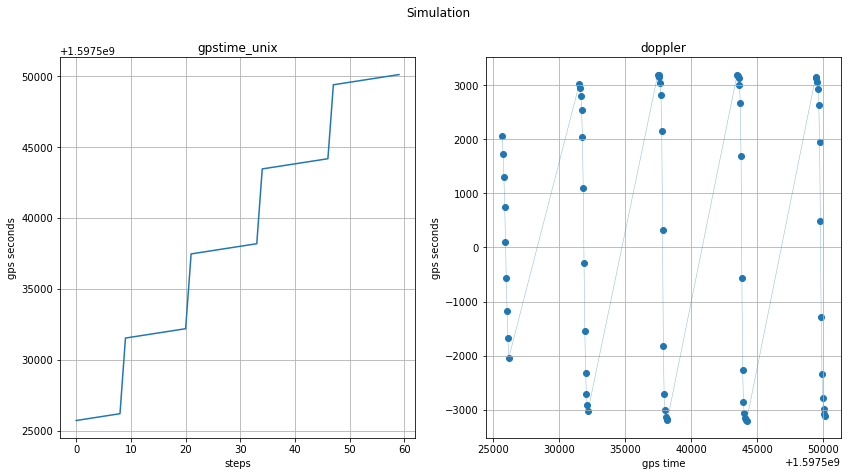

In [35]:
import time
import numpy as np
import argparse
import os
import json

from astropy.time import Time   # Astropy 4.1rc1 is used

from orbitdeterminator.doppler.utils.utils import *
from orbitdeterminator.doppler.utils.utils_aux import *
from orbitdeterminator.doppler.utils.utils_vis import *

def parse_json_data(filename):
    data = None

    with open(filename) as json_file:
        data = json.load(json_file)

        n_s = len(data['observation'])      # Number of stations
        n_m = len(data['observation'][0]['data']['gpstime_unix'])       # Number of measurements (first station)

        data_tle = []                                   # Satellite
        data_station_name = []                          # Station name
        data_gpstime_unix = np.zeros((n_m, n_s))        # Time
        data_doppler = np.zeros((n_m, n_s))             # Mesurement (?)
        data_station_pos = np.zeros((3, n_m, n_s))      # Position
        data_station_vel = np.zeros((3, n_m, n_s))      # Velocity
        data_station_vec = np.zeros((6, n_m, n_s))      # State vector

    # Temporary debug
    for i, d in zip(range(n_s), data['observation']):
        print(len(d['data']['doppler']))

    # Temporary

    for i, d in zip(range(n_s), data['observation']):
        #print (f"{i} {d['station']}")
        data_tle.append(d['orbit'])
        data_station_name.append(d['station'])

        temp_data_doppler = np.array(d['data']['doppler'])
        temp_gpstime_unix = np.array(d['data']['gpstime_unix'])
        temp_station_pos = np.array(d['data']['station_pos']).T
        temp_station_vel = np.array(d['data']['station_vel']).T

        data_doppler[:,i] = temp_data_doppler[:n_m]
        data_gpstime_unix[:,i] = temp_gpstime_unix[:n_m]
        data_station_pos[:,:,i] = temp_station_pos[:,:n_m]
        data_station_vel[:,:,i] = temp_station_vel[:,:n_m]

    data_station_vec[0:3, :, :] = data_station_pos
    data_station_vec[3:6, :, :] = data_station_vel
        
    return data_tle, data_station_name, data_gpstime_unix, data_doppler, data_station_pos, data_station_vel, data_station_vec
    


data_tle, data_station_name, data_gpstime_unix, data_doppler, data_station_pos, data_station_vel, data_station_vec = parse_json_data("../data/data.txt")


print(data_gpstime_unix.shape)
print(data_doppler.shape)
print(data_station_pos.shape)
print(data_station_vec.shape)


idx = 0

fig = plt.figure(figsize=(14,7))
fig.suptitle("Simulation")

ax_1 = fig.add_subplot(121)
ax_1.plot(data_gpstime_unix[:,idx])
ax_1.set_xlabel('steps')
ax_1.set_ylabel('gps seconds')
ax_1.title.set_text("gpstime_unix")
ax_1.grid(':')

ax_2 = fig.add_subplot(122)
ax_2.scatter(data_gpstime_unix[:,idx], data_doppler[:,idx])
ax_2.plot(data_gpstime_unix[:,idx], data_doppler[:,idx],linewidth=0.5, alpha=0.5)
ax_2.set_xlabel('gps time')
ax_2.set_ylabel('gps seconds')
ax_2.title.set_text("doppler")
ax_2.grid(':')
